<a href="https://colab.research.google.com/github/nishkarsh-coder/machine-learning-algo../blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model 
from sklearn.datasets import load_boston

In [ ]:
boston=load_boston()
data=boston["data"]
target=boston['target']
col_name=boston['feature_names']

In [ ]:
df=pd.DataFrame(data,columns=col_name)

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
df["Price"]= pd.DataFrame(target)

In [ ]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
469,13.07510,0.0,18.10,0.0,0.580,5.713,56.7,2.8237,24.0,666.0,20.2,396.90,14.76,20.1
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01,12.7
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
177,0.05425,0.0,4.05,0.0,0.510,6.315,73.4,3.3175,5.0,296.0,16.6,395.60,6.29,24.6


In [ ]:
sns.pairplot(df)

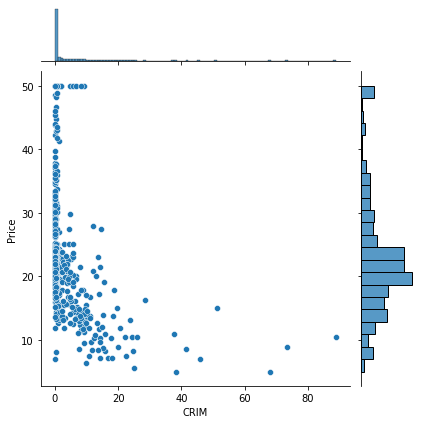

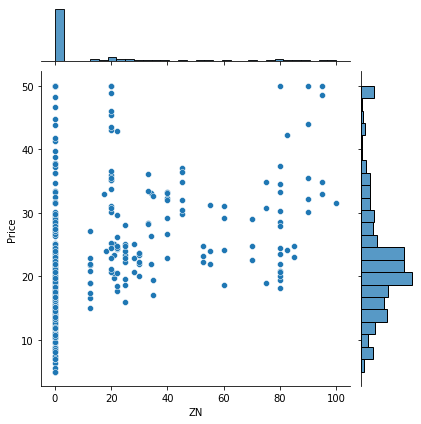

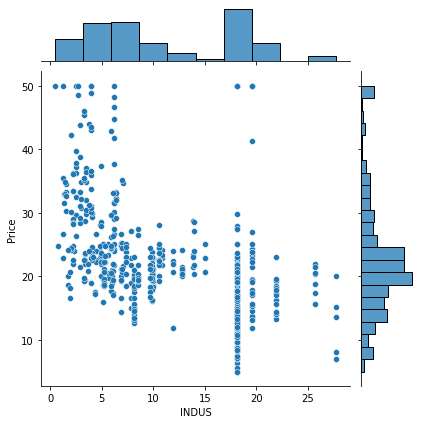

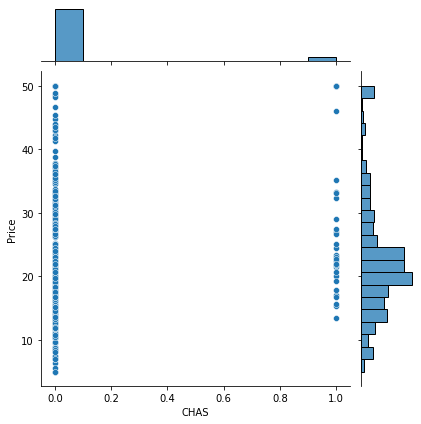

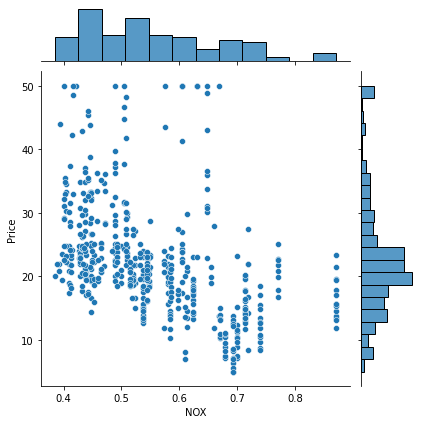

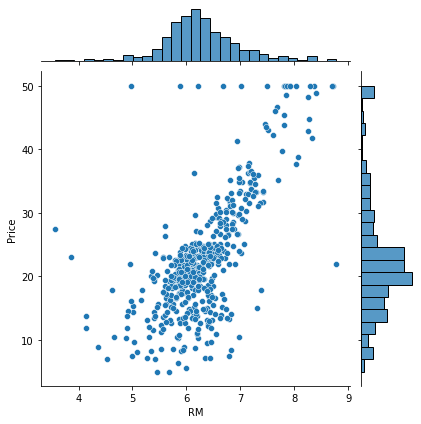

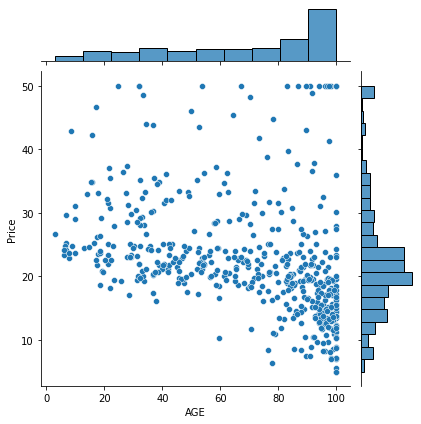

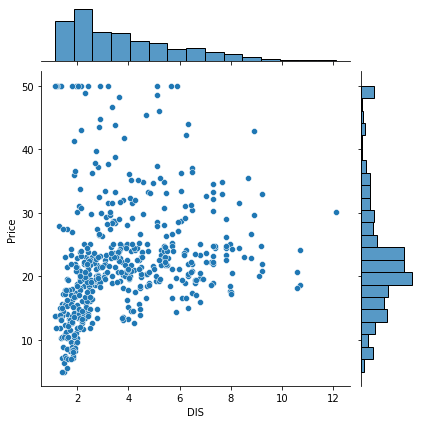

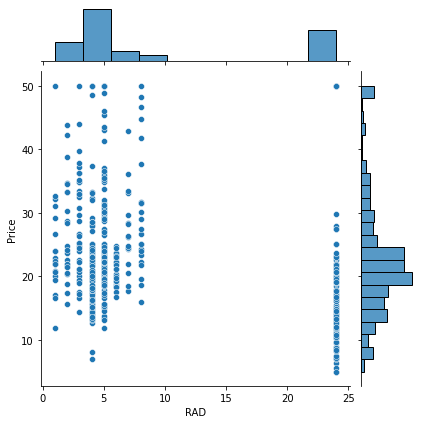

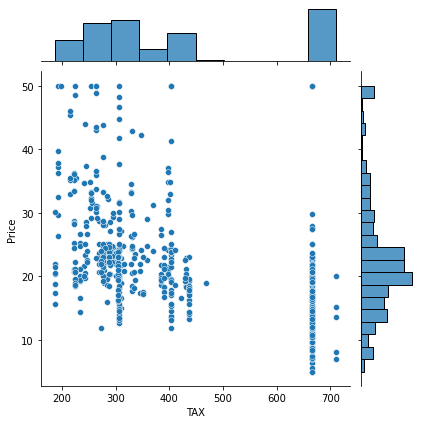

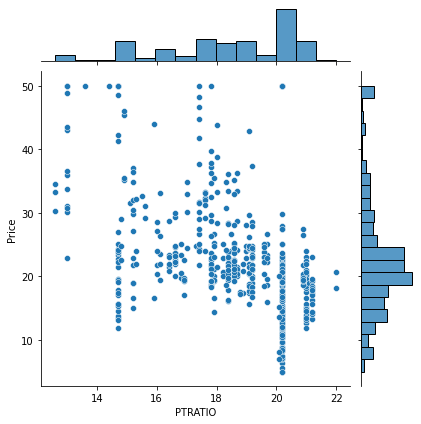

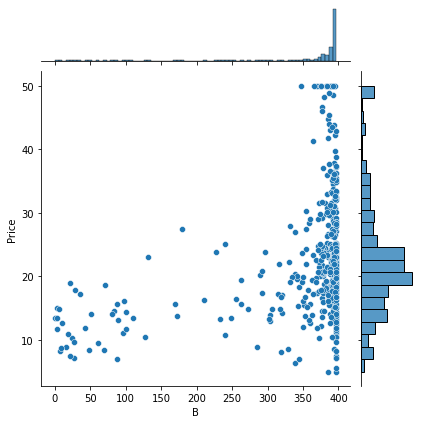

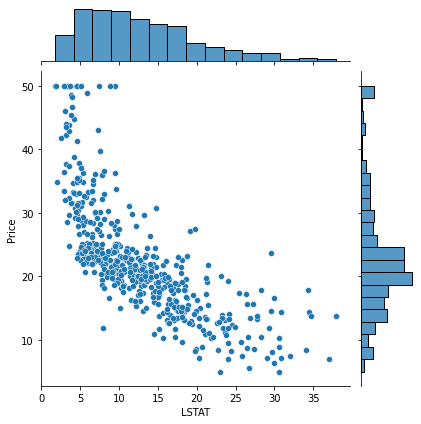

In [ ]:
for i in col_name:
  sns.jointplot(x=df[i],y=df["Price"])
  # print(df[i].unique())

In [ ]:
df.corr()["Price"].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
Price      1.000000
Name: Price, dtype: float64

In [ ]:
lf= linear_model.LinearRegression()
type(lf)

sklearn.linear_model._base.LinearRegression

####we are using simple linear regression model with split train and test dataset..

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.3)

In [ ]:
lf.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(lf.intercept_)
lf.coef_

38.24994020126742


array([-1.20563433e-01,  5.58292483e-02,  3.57453920e-02,  3.06751034e+00,
       -1.83831635e+01,  3.55976963e+00, -2.61296927e-03, -1.63685546e+00,
        3.13240719e-01, -1.13524131e-02, -9.33506750e-01,  1.05301500e-02,
       -5.57916363e-01])

In [ ]:
y_predict= lf.predict(x_test)

In [ ]:
lf.score(x_test,y_test)

0.6821914735762752

###we are using linear regression model and cross validation..


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lf,x_train,y_train,cv=4)
scores

array([0.71600423, 0.80513009, 0.65395116, 0.71722673])

In [ ]:
scores.mean()

0.7230780537218927